# 프로젝트 배경, 가설, 분석방법:

< 프로젝트 배경> 
- 협업필터링 추천모델과 유저의 취향/TPO(Time, Place, Occasion)특성을 추가한 하이브리드 추천모델을 비교하여 유저별 다양한 맞춤추천모델링을 구현하고자 시작한 프로젝트입니다.

< 가설 및 분석방법 > 

- 1) "아이템기반 협업필터링(ex.knn-baseline-item-based)보다 SVD협업필터링의 추천모델 성능이 더 좋을 것이다." 
 - 분석방법: rmse, mae 수치 비교.
- 2)  "아이템기반orSVD협업필터링의 추천목록 보다 latent feature를 추가한 하이브리드(hybrid) 추천목록 순위 평가지표수치가 더 높을 것이다."
 - 분석방법: recall, precision, nDCG지표 비교. 실제 서비스에서는 유저의 반응도가 가장 좋은 지표가 될 수 있을 것. 



## 개념이해: 추천모델이란? (matrix factorization / collaborative filtering - user_based / item_based / hybrid ) 
- [realpython-Build a recommendation system](https://realpython.com/build-recommendation-engine-collaborative-filtering/)
- ### matrix factorization or collaborative filtering이란?
 ### : item들에 대한 user들의 rating 정보를 바탕으로 유사도를 계산하여 아이템을 추천하는 것. (유사 그룹을 찾아서 아이템을 추천: user-based CF / 유사 아이템을 찾아서 추천: item-based CF)

- 핵심문제: 
To find the rating R that a user U would give to an item I, the approach includes:

- (1) **Finding users similar to U** who have rated the item I
- (2) **Calculating the rating R** based the ratings of users found in the previous step

- similarity : 
 - higher similarity: lower angle(cosine) & smaller distance(euclidean) 
 - lower similarity : higher angle & bigger distance 
 - user 들간의 bias(유사한 그룹의 유저이지만, 평점 자체의 기준이 다른. 같은 영화를 봤지만, A유저는 3.5점을 B유저는 4점을 주는 경우) 를 없애기 위해, 비어있는 공간을 각 유저의 평점값의 평균값으로 채운 다음 cosine similarity 를 구하면 **centered cosine similarity**가 나오고, 이것은 **Pearson correlation coefficient**와 같음. 




 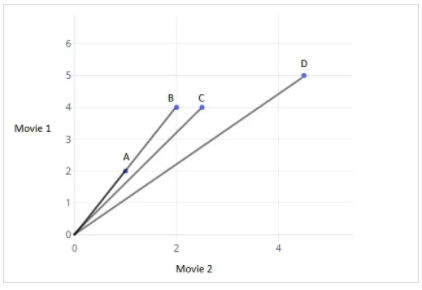

### 1) user-based (user to user) collaborative filtering 

 : 유사한 유저들이 매긴 평점으로 유저A의 아이템 I에 대한 평점을 예측하는 것. 

 > (한계점) 오직 평점을 기준으로 유사그룹을 측정한다는 점. 뒤이어 유저들의 다른 특성을 추가 분석해서 유사그룹을 측정하는 모델이 있음.

> [이미지 출처](https://takuti.github.io/Recommendation.jl/latest/collaborative_filtering/)


 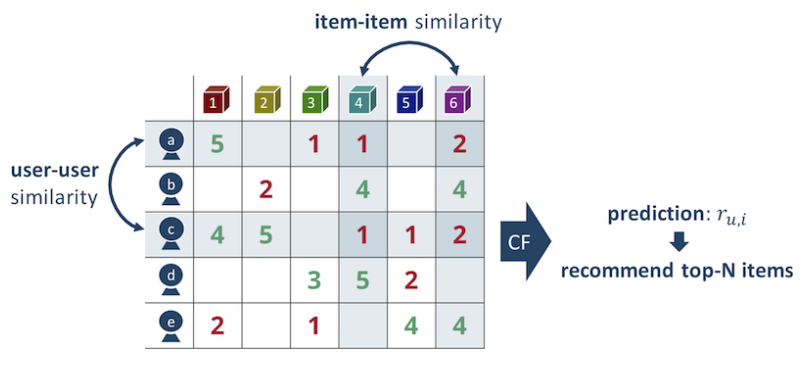


### 2) item-based(item to item/content based) collaborative filtering 

 : 유저A가 본 아이템들과 보지 않은 아이템들중, 아이템의 유사도를 측정해 유사한 아이템을 예측함. (amazon에서 만든 개념)
 > (장점) 아이템보다 유저가 많을 경우, 아이템베이스 모델이 유저베이스모델보다 더 빠르고, 안정적이라고 함.
 또한 sparse matrix(아이템에 대한 평점이 다 채워져 있지 않은 매트릭스)에서 유저베이스모델보다 잘 작동한다고 알려져 있다고 함. 
 > 
 > (이유) : 아이템에 대한 평점평균의 변동성이 유저에 의한 평점평균 변동성보다 낮기 때문.
 > 
 > (한계점) 베토벤 곡을 좋아한다고 그의 모든 곡을 좋아하지 않을 수 있는데 추천할 수 있다는 점) 
 > 이커머스에서는 아이템베이스가 잘 작동하는 경우도 많다고 함. (영화추천같은 타겟이 명확한 데이터의 경우, user-based 혹은 hybrid(유저의 다른 특성을 추가한)추천이 낫다고 함.)




### 3) matrix factorization 
 - memory based approach model 로도 불림. 
 - (이유) user matrix(6*2) , item matrix (2*6) 의 연관관계를 보고자 할 때, 각 행렬의 3차원의 벡터 정점들을 두 행렬을 곱함으로써, (X * Y) 라는 하나의 matrix에 2차원으로 축약하여 dimensionality 가 낮아진 것.   

- 왼쪽 m(user matrix) 의 칼럼 2개가 latent factors(an indication of hidden characteristics about the users) 위에 있는 n(item matrix)도 마찬가지. 
- 예를 들어, m(2, -1)에서 2가 호러영화, -1이 로맨스영화에 대한 평점이고, n(2.5, 1) 의 2.5는 호러무비일 가능성, 1은 로맨스영화일 가능성이라고 가정할 때, 두 벡터를 곱한 4(호러무비에 대한)는 평점이 5점일 수도 있었지만, 로맨스에 대한 잠재적 선호도 때문에 4가 매겨진 것으로 분석할 수 있음. 

- 하지만 현실에서는 latent factor가 genre뿐 아니라 더 복잡하게 얽혀 있음. (그래서 이 부분을 해결하기 위해 autoencoder등을 활용하기도 하는 듯) 

- latent factor 를 활용하면 더 개인화된 추천을 할 수도 있지만, 너무 factor가 많으면 오버피팅문제가 발생한다고 함. 

- Algorithms for Matrix Factorization :  
 - (1) svd(singular value decomposition) : Netflix prize competition 에서 좋은 성과를 보여 유명해짐. 
 - (2) PCA, 그리고 pca변형모델 NMF
 - (3) autoencoders 



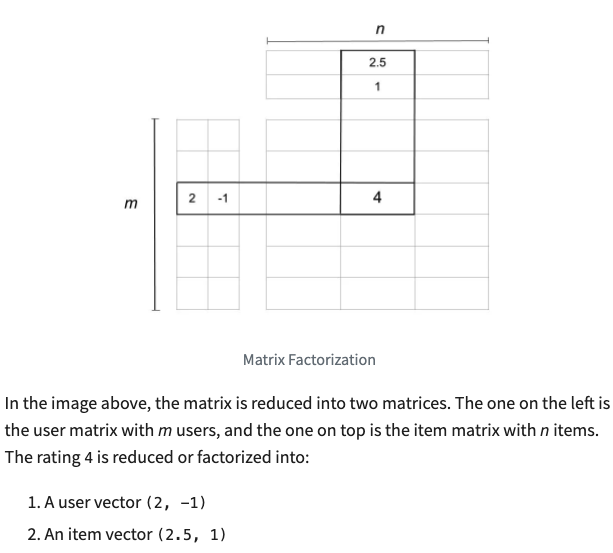


### 4) 평가지표 (rmse / mae )

<참고자료>
- [Evaluating Recommender Systems: Root Means Squared Error or Mean Absolute Error?](https://towardsdatascience.com/evaluating-recommender-systems-root-means-squared-error-or-mean-absolute-error-1744abc2beac
) 

- MAE(mean absolute error) : 아웃라이어 영향을 고려하지 않을 때, 사용. 
- RMSE(rood mean square error) : 아웃라이어 영향을 고려할 때 사용. 항상 RMSE > MAE 

MSE(rood mean square error) : 아웃라이어 영향을 고려할 때 사용. 항상 RMSE > MAE 

- RMSE를 쓰는 이유: 
 - 큰 오류값에 대해 크게 반영함으로써 모델의 정확도를 더 정확하게 높이고 싶을 때 활용. 
 - rmse는 절대값을 사용하지 않기 때문에 거리(distance)/기울기(gradient)을 포함한 기타 metrics계산에 있어 수학적으로 편리해서 사용한다고 함. 
 - 대부분의 ML 손실함수(cost-functions)에서 MAE를 잘 사용하지 않는다고 하며, 편차제곱의 합이나 편차제곱의 루트(RMSE)값을 사용. 
 - 추천시스템에서의 활용: 예측된 평점과 검증/훈련셋의 실제 평점 값을 비교하여 얼마나 정확하게 예측했는지 측정. 
 - ※참고: https://data101.oopy.io/mae-vs-rmse

### 5) 유사도&가중치 similarity / predicting&calculating rating 
유저A 와 가장 유사한 top 5/10 유저들의 평점을 기반으로 유저A의 아이템 I에 대한 평점을 예측. 
- i. 단순하게 top 5/10유저들의 평점 평균을 유저A가 내일 평점으로 예측하는 방법. 

 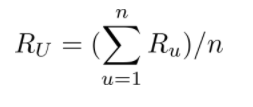


 - ii. **weighted average**를 사용하는 방법. (top3가 top10유저들보다는 더 유사할 것이라고 가정) **similarity를 가중치로 rating에 곱해줌.** 
 - i수식은 'n'으로 나눠주는데, 가중치가 '1'인셈. ii수식은 각 평점에 가중치를 곱했기 때문에 분모에 'n*가중치(=n개 가중치의 합)'으로 나눠준 것. 

 - 이러한 방식('유사도를 가중치로 반영한 평점'으로 계산한)의 결과에도 variation (편차)가 존재할 수 있는데, 그 편차와 관련하여 'user_based / item_based'개념을 이해해야 함. 

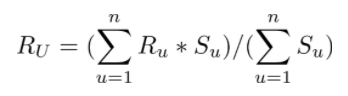


### 6) 추천목록 순위 (recommendations ranking) / 평가지표(precision / recall @ k / nDCG)

- precision(정밀도) @ k: 추천된 k개의 아이템들 중 유사도(similarity)가 있는/높은 아이템들의 비중. (전체 추천목록 중 유사도가 있는 추천 아이템들이 얼마나 되는지 측정.) 

- recall(재현율) @ k: 유사도(similarity)가 있는/높은 아이템들 중 추천된 k개의 아이템들의 유사도 비중. (전체 추천목록 자체가 얼마나 유사도가 높은지 측정) 

- nDCG(normalizing Discounted Cumulative Gain) @ k: 가장 이상적으로 나올 수 있는 순위의 평점과 모델을 통해 나온 추천순위의 평점을 누적점수로 비교하여 얼마나 이상적인 순위인지 평가하는 지표. 


<참고문헌> 
- (1) precision, recall @ k 개념: 
https://ddiri01.tistory.com/321

- (2) precision, recall @ k 구현 코드 : 
https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=recommendation#how-to-compute-precision-k-and-recall-k

- (3) nDCG개념 : 
https://yamalab.tistory.com/119


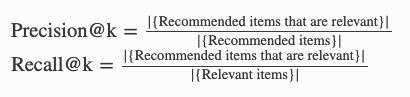

### 7) hybrid model 

<개념> 
- hybrid model 이 나온 배경: 기존의 CF 알고리즘만으로는 '추천된 상품들이 다 비슷한 느낌, 피로도가 높아지는(신선한 아이템으로 느껴지지 않는) 등으로 인해 실제 만족하는 아이템과의 괴리가 높아지는' 문제 발생.  
- **"해당 유저와 비슷한 유저가 구매/조회한 아이템이면서, 그 아이템의 다른 추가 속성(ex. 유사한 장르/유사한 카테고리 등)에 있는 다른 아이템도 추가로 추천하자!"** 라는 아이디어에서 발생됨. 
- 우연성(serendipity) 개념: 추천 알고리즘들이 개인화되었다고는 하지만, 그래도 아이템의 인기도에 크게 의존을 합니다. 그렇기 때문에 많은 사용자들이 좋아하는 일반적인 아이템은 자주 추천이 됩니다. 일반적인 아이템이 추천이 되면 너무 뻔해서 만족도가 떨어집니다. 그래서 연관성은 있지만 (관심을 가질 법 한 범위 내에서) 그래도 새로운/신선한 것을 추천해주도록 추천 시스템들이 진화하고 있습니다. 그런 측면에서 추천 시스템은 Recommendation Engine에서 Discovery Engine으로 발전하고 있습니다. 우연성을 너무 강조해서 너무 생뚱맞은 것을 추천해주면 또 곤란합니다. 어려운 문제입니다. 추천 점수에서 상위 1~2개 정도의 아이템만 추천해주는 경우에는 뻔하지만 연관성이 높은 아이템을 추천해줄 때 사용자들의 만족도가 높아지고, 다수의 아이템을 동시에 추천해주는 경우 (Top 10 등)에는 다양한 아이템들이 추천될 때 사용자 만족도가 증가한다고 알려져있습니다. 그리고, 초보 서비스 이용자들에게는 연관성이 높은 아이템들을, 헤비 유저에게는 우연성이 높은 아이템들을 추천해주는 것도 대부분의 사용자를 만족시키는 한 방안입니다.

- 하이브리드 모델 방식: (user-based) CF 방식에 CBF(content-based) 방식을 결합해서 하이브리드 형태로 추천 시스템을 만듭니다. 예를 들어, '이영화를 봤던 사람들이 봤던 다른 영화들'과 '이 영화의 장르/감독/배우들의 다른 영화들'을 혼합해서 추천해주는 것입니다. 그리고, 커버리지가 낮다는 것은 (같은 아이템을 계속 추천/노출시킴으로써) 사용자들은 추천 피로도가 쌓이게 됩니다. 그래서 추천 커버리지 또는 다양성, 그리고 앞서 말했던 우연성은 중요합니다.

출처1. ['추천시스템의 성능 평가방법 및 고려사항' ](https://bahnsville.tistory.com/900)

출처2. [Hybrid recommendations approach](https://www.math.uci.edu/icamp/courses/math77b/lecture_12w/pdfs/Chapter%2005%20-%20Hybrid%20recommendation%20approaches.pdf)


<구현 코드 자료> 

- [hybrid_model_CF and Latent factor models 
](https://github.com/prakruti-joshi/Movie-Recommendation-System/blob/master/Code/hybrid_model.ipynb)

# 데이터 로드
- 1안) women clothes review data
- 2안) [RentTheRunWay data ](https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation?select=renttherunway_final_data.json)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터셋) RentTheRunway
- 원본출처: https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation?select=renttherunway_final_data.json

About this file
Number of customers: 105,508

Number of products: 5,850

Number of transactions: 192,544

Field Description:

item_id: unique product id

weight: weight measurement of customer

rented for: purpose clothing was rented for

body type: body type of customer

review_text: review given by the customer

review_summary: summary of the review

size: the standardized size of the product

rating: rating for the product

age: age of the customer

category: the category of the product

bust size: bust measurement of customer

height: height of the customer

fit: fit feedback

user_id: a unique id for the customer

review_date: date when the review was written

### 데이터 로드, 전처리

In [ ]:
# 확인할 것 유저당 여러개의 아이템을 평가했는지. 

# reading the JSON data using json.load()
import pandas as pd
import json
# file = '/content/drive/MyDrive/ds-capstone-pj1_2102/#women_fashion data/renttherunway_final_data.json'
# with open(file, 'r') as file:
#     data = json.load(file)

rent = [json.loads(line) for line in open('/content/drive/MyDrive/ds-capstone-pj1_2102/#women_fashion data/renttherunway_final_data.json', 'r')]

# converting json dataset from dictionary to dataframe
df_r = pd.DataFrame(rent)
# data.reset_index(level=0, inplace=True)
df_r.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


In [ ]:
df_r.dtypes

fit               object
user_id           object
bust size         object
item_id           object
weight            object
rating            object
rented for        object
review_text       object
body type         object
review_summary    object
category          object
height            object
size               int64
age               object
review_date       object
dtype: object

In [ ]:
df_r.isna().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [ ]:
# 결측치 제거 
df_r = df_r.dropna(subset=['rating', 'rented for'])
df_r.isna().sum()

fit                   0
user_id               0
bust size         18394
item_id               0
weight            29957
rating                0
rented for            0
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

In [ ]:
df_r['rating'] = df_r['rating'].astype(int)
df_r['user_id'] = df_r['user_id'].astype(int)
df_r['item_id'] = df_r['item_id'].astype(int)

In [ ]:
df_r['rating'] = df_r['rating']//2


In [ ]:
df_r.dtypes

fit               object
user_id            int64
bust size         object
item_id            int64
weight            object
rating             int64
rented for        object
review_text       object
body type         object
review_summary    object
category          object
height            object
size               int64
age               object
review_date       object
dtype: object

In [ ]:
df_r['rating'].value_counts()

5    124531
4     53388
3     10697
2      2791
1      1045
Name: rating, dtype: int64

In [ ]:
# 데이터가 너무 커서 런타임 에러 발생, 최근 데이터 중 적당한 사이즈로 잘라냄. 
import datetime
df_r['review_date'] = pd.to_datetime(df_r['review_date'])
# data.dtypes
# data['review_date'].sort_values(ascending=False)
start_date = '2017-10-01'
end_date = '2018-12-31'
mask = (df_r['review_date'] >= start_date) & (df_r['review_date']<= end_date)
df_r = df_r.loc[mask]
df_r

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
6,fit,336066,34c,568429,112lbs,5,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,"5' 3""",4,27,2017-12-07
10,small,185966,34b,1077123,135lbs,4,party,The dress arrived with a small hole in the bea...,athletic,It was fun to wear a dress I wouldn't normally...,dress,"5' 3""",12,33,2018-01-02
17,fit,339899,34d,1622747,143lbs,5,party,"Little tight, but loved this dress!!!",athletic,LOVED,dress,"5' 5""",12,26,2017-11-13
19,small,16800,34c,1229740,135lbs,5,formal affair,"super cute, 8 was super tight so i wore the 10...",petite,gala ready,gown,"5' 6""",21,33,2017-11-16
25,fit,85200,32dd,875667,140lbs,4,other,Absolutely beautiful dress. The details were i...,NaN,Elegance and sophistication,dress,"5' 6""",8,30,2017-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192495,fit,410394,40b,542348,155lbs,5,formal affair,Form fitting but not too tight. Mid to heavywe...,NaN,Elegant with just the right amount of flair.,sheath,"5' 5""",28,55,2017-11-08
192523,fit,105485,34d,2058499,137lbs,5,date,"I could've worn either, but opted for the larg...",pear,Very comfortable,romper,"5' 3""",20,40,2017-10-01
192525,large,240016,36d,1568818,168lbs,4,party,I wore this to my husband's holiday party that...,apple,"Fun, flirty dress - great for a holiday party!",dress,"5' 7""",24,38,2017-12-20
192528,small,597756,38dd,300980,220lbs,5,wedding,First time using RTR. I wasn't sure what to ex...,full bust,I felt fierce in this dress!,dress,"5' 4""",35,32,2017-11-12


In [ ]:
item_ = df_r.groupby(by='item_id').count()
item_
# item_['user_id'].value_counts()

,fit,user_id,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
item_id,,,,,,,,,,,,,,
123373,25,25,21,22,25,25,25,20,25,25,25,25,25,25
123793,84,84,79,71,84,84,84,69,84,84,84,84,83,84
124204,28,28,27,26,28,28,28,24,28,28,28,28,28,28
124553,20,20,20,17,20,20,20,17,20,20,20,20,20,20
125424,26,26,22,22,26,26,26,24,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963850,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2964470,4,4,4,3,4,4,4,3,4,4,4,4,4,4
2965009,4,4,3,3,4,4,4,4,4,4,4,4,4,4


In [ ]:
user_ = df_r.groupby(by='user_id').count()
user_
# user_['item_id'].value_counts()

,fit,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
user_id,,,,,,,,,,,,,,
35,1,1,1,1,1,1,1,1,1,1,1,1,1,1
101,1,1,1,1,1,1,1,0,1,1,1,1,1,1
127,1,1,1,1,1,1,1,1,1,1,1,1,1,1
224,1,1,1,1,1,1,1,1,1,1,1,1,1,1
321,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999865,1,1,1,1,1,1,1,1,1,1,1,1,1,1
999894,1,1,1,0,1,1,1,0,1,1,1,1,0,1
999910,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_r.groupby(by='category').count()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,height,size,age,review_date
category,,,,,,,,,,,,,,
ballgown,16,16,16,16,13,16,16,16,15,16,16,16,16,16
blazer,92,92,87,92,77,92,92,92,84,92,92,92,92,92
blouse,202,202,187,202,165,202,202,202,186,202,200,202,202,202
blouson,13,13,12,13,11,13,13,13,12,13,12,13,13,13
bomber,84,84,80,84,74,84,84,84,81,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trouser,28,28,27,28,25,28,28,28,27,28,28,28,28,28
trousers,7,7,4,7,5,7,7,7,5,7,7,7,7,7
tunic,17,17,14,17,15,17,17,17,16,17,16,17,17,17


In [ ]:
# item_id별 user_id : 1:n관계 
# user_id별 item_id : 1:n관계 
# category 별 item_id : 1:n관계 
 ## 추천 시스템에 적용하기에 적합한 데이터로 판단됨. (유사 유저그룹 판단 후 아직 경험하지 않은 아이템을 추천해야 하기 때문)

#### rating_average 추가된 merge 데이터

In [ ]:
mean_df = df_r[['item_id','rating']].groupby(by='item_id').mean()
mean_df = mean_df.reset_index()
mean_df = mean_df.rename(columns={'rating': 'rating_average'})
mean_df

,item_id,rating_average
0,123373,4.680000
1,123793,4.857143
2,124204,4.821429
3,124553,4.300000
4,125424,4.500000
...,...,...
4809,2963850,4.500000
4810,2964470,5.000000
4811,2965009,4.750000
4812,2965924,4.666667


In [ ]:
df_r_merge = pd.merge(df_r, mean_df, how='left', on='item_id')
df_r_m = df_r_merge.rename(columns={'rented for': 'TPO'})
df_r_m['user_id'] = df_r_m['user_id'].astype(int)
df_r_m['item_id'] = df_r_m['item_id'].astype(int)
# df_r_merge.dtypes
df_r_m.head()

,fit,user_id,bust size,item_id,weight,rating,TPO,review_text,body type,review_summary,category,height,size,age,review_date,rating_average
0,fit,336066,34c,568429,112lbs,5,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,"5' 3""",4,27,2017-12-07,4.800000
1,small,185966,34b,1077123,135lbs,4,party,The dress arrived with a small hole in the bea...,athletic,It was fun to wear a dress I wouldn't normally...,dress,"5' 3""",12,33,2018-01-02,4.444444
2,fit,339899,34d,1622747,143lbs,5,party,"Little tight, but loved this dress!!!",athletic,LOVED,dress,"5' 5""",12,26,2017-11-13,4.600000
3,small,16800,34c,1229740,135lbs,5,formal affair,"super cute, 8 was super tight so i wore the 10...",petite,gala ready,gown,"5' 6""",21,33,2017-11-16,4.666667
4,fit,85200,32dd,875667,140lbs,4,other,Absolutely beautiful dress. The details were i...,NaN,Elegance and sophistication,dress,"5' 6""",8,30,2017-10-21,4.444444


In [ ]:
df_r_m.dtypes

fit                       object
user_id                    int64
bust size                 object
item_id                    int64
weight                    object
rating                     int64
TPO                       object
review_text               object
body type                 object
review_summary            object
category                  object
height                    object
size                       int64
age                       object
review_date       datetime64[ns]
rating_average           float64
dtype: object

In [ ]:
df_r_m['rating'].value_counts()

5    14630
4     5998
3     1094
2      473
1       95
Name: rating, dtype: int64

### 데이터 EDA

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 38.3MB 598kB/s
     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 1.1MB 12.1MB/s 
     |████████████████████████████████| 3.2MB 21.9MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 296kB 42.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=024ed8fb5fa64e66aa0ba1a48b4b4dd20bc520175af173900c73fd843d836678
  Stored in directory: /tmp/pip-ephem-wheel-cache-cn3fqf1n/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=ed17ffb110ad1d0cacf71263e242ef76fe1f6c7ccfacacfea49c268a62c88046
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=

In [ ]:
import pandas as pd
import pandas_profiling
df_r_m.profile_report()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **모델 분석방법**
 - knn-baseline(item-based), knn-baseline(user-based), SVD, SVDpp, gridsearchCV(SVDpp), 하이브리드 모델의 (rmse, mae, precision, recall, nDCG 수치 비교)


## **1-1) 모델 선정**
- knnbaseline (item-to-item / user-to-user similiarity model) 
- SVD (collaborative filtering - user&item matrix filterging) 
- SVDpp (collaborative filtering taking into account implicit rating) 
- GridsearchCV (SVDpp, best hyperparameter model) 

 - **모델 성능 평가지표 : rmse / mae**

 - 참고자료: 

  - (1) ['Build a Recommendation Engine With Collaborative Filtering'](https://realpython.com/build-recommendation-engine-collaborative-filtering/)

  - (2) [knn baseline(item-item, user-user), SVD(CF) , SVDpp _ rmse/mae 비교 ](https://github.com/prakruti-joshi/Movie-Recommendation-System/blob/master/Code/cold_start_analysis.ipynb)

#### Surprise 모듈 설치

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8MB 8.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617593 sha256=6a2eb3219c602ce36b2e4ed5a455bdb2b8897ba8ae8468abca5d14a5d7c637e9
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


#### surprise 모듈 임포트


In [ ]:
import pandas as pd
import numpy as np

from surprise import SVD, BaselineOnly, SVDpp, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBaseline
from surprise import accuracy
from surprise import dump
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

#### train, test set 

In [ ]:
# train, test set split 

## data randomly shuffling.  
df_r_m = df_r_m.sample(frac=1)
df_r_m

len(df_r_m)
cutoff = int(.6 * len(df_r_m))
train_r = df_r_m[:cutoff]
test_r = df_r_m[cutoff:]

train_r = train_r[['user_id', 'item_id', 'rating', 'category', 'TPO']]
test_r = test_r[['user_id', 'item_id', 'rating', 'category', "TPO"]]
print("train_size:", len(train_r), "test_size:", len(test_r))
train_r.head()

train_size: 13374 test_size: 8916


,user_id,item_id,rating,category,TPO
7229,575029,1547178,5,sheath,other
10435,607995,1323121,4,gown,wedding
7321,736721,1987884,5,dress,formal affair
14227,809573,834620,5,gown,formal affair
1564,50699,1166927,4,dress,other


In [ ]:
def convert_traintest_dataframe_forsurprise(training_dataframe, testing_dataframe):
    reader = Reader(rating_scale=(0, 5))
    trainset = Dataset.load_from_df(training_dataframe[['user_id', 'item_id', 'rating']], reader)
    testset = Dataset.load_from_df(testing_dataframe[['user_id', 'item_id', 'rating']], reader)
    
    trainset = trainset.construct_trainset(trainset.raw_ratings)
    testset = testset.construct_testset(testset.raw_ratings)
    
    return trainset, testset


In [ ]:
trainset, testset = convert_traintest_dataframe_forsurprise(train_r, test_r)

#### (1) Knn-baseline 모델

In [ ]:
# basic collaborative filtering algorithm taking into account a baseline rating.
# content-based filtering (CBF)
# 참조: https://surprise.readthedocs.io/en/stable/knn_inspired.html

sim_options = {'name': 'cosine',
               'user_based': False  # content(item)-based similarity
               }
knnbaseline_algo_i = KNNBaseline(sim_options=sim_options)

knnbaseline_algo_i.fit(trainset)
knnbaseline_predictions_i = knnbaseline_algo_i.test(testset)

file_name = 'KnnBaseline_model_i'
dump.dump(file_name, algo=knnbaseline_predictions_i)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(knnbaseline_predictions_i)
accuracy.mae(knnbaseline_predictions_i)
print("Done!")


Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7181
MAE:  0.5647
Done!


In [ ]:
# basic collaborative filtering algorithm taking into account a baseline rating.
# user-based filtering (CBF)
# 참조: https://surprise.readthedocs.io/en/stable/knn_inspired.html

sim_options = {'name': 'cosine',
               'user_based': True  # user-based similarity
               }
knnbaseline_algo_u = KNNBaseline(sim_options=sim_options)

knnbaseline_algo_u.fit(trainset)
knnbaseline_predictions_u = knnbaseline_algo_u.test(testset)

file_name = 'KnnBaseline_model_u'
dump.dump(file_name, algo=knnbaseline_predictions_u)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(knnbaseline_predictions_u)
accuracy.mae(knnbaseline_predictions_u)
print("Done!")


Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7169
MAE:  0.5639
Done!


In [ ]:
knnbaseline_predictions_i = knnbaseline_algo_i.test(testset)
knnbaseline_predictions_i[:3]

[Prediction(uid=365540, iid=894000, r_ui=5.0, est=4.675704433962529, details={'was_impossible': False}),
 Prediction(uid=767659, iid=191243, r_ui=3.0, est=4.5547330641543295, details={'was_impossible': False}),
 Prediction(uid=510821, iid=2712258, r_ui=5.0, est=4.591007587516574, details={'was_impossible': False})]

In [ ]:
# uid, iid, r_ui(실제 평점) ,est(예측평점) 추출

[(pred.uid, pred.iid, pred.est) for pred in knnbaseline_predictions_i[:3]]


[(365540, 894000, 4.675704433962529),
 (767659, 191243, 4.5547330641543295),
 (510821, 2712258, 4.591007587516574)]

In [ ]:
# uid = 998923 에 대한 유사도 높은 예측 iid, est 조회. 
# 참고: https://hmkim312.github.io/posts/%EC%84%9C%ED%94%84%EB%9D%BC%EC%9D%B4%EC%A6%88(Surprise)%EB%A5%BC_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C(Recommendations)/
pred_df = pd.DataFrame(knnbaseline_predictions_i)
pred_df[(pred_df['uid']==998923)]

,uid,iid,r_ui,est,details
2688,998923,2125959,5.0,4.606382,"{'actual_k': 0, 'was_impossible': False}"
2723,998923,2777056,5.0,4.679978,"{'actual_k': 0, 'was_impossible': False}"
3117,998923,2322793,4.0,4.189743,"{'actual_k': 0, 'was_impossible': False}"
3237,998923,2082667,5.0,4.637000,"{'actual_k': 0, 'was_impossible': False}"
5006,998923,2279234,5.0,4.716338,"{'actual_k': 0, 'was_impossible': False}"
7868,998923,2637649,4.0,4.653189,"{'actual_k': 0, 'was_impossible': False}"
8238,998923,2584153,5.0,4.653189,"{'actual_k': 0, 'was_impossible': False}"


### (2) svd, svdpp (CF) 모델

In [ ]:
 ## svd 
 ## 참고: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms

svd_algo = SVD()

svd_algo.fit(trainset)
svd_predictions = svd_algo.test(testset)

file_name = 'svd_model'
dump.dump(file_name, algo=svd_algo)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(svd_predictions)
accuracy.mae(svd_predictions)
print("Done!")



RMSE: 0.7182
MAE:  0.5602
Done!


In [ ]:
# matrix factorization/ collaborative filtering(CF)
 ## svd++ model : taking into account implicit ratings 
 ## 참고: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp

svdpp_algo = SVDpp()

svdpp_algo.fit(trainset)
svdpp_predictions = svdpp_algo.test(testset)

file_name = 'svdpp_model'
dump.dump(file_name, algo=svdpp_algo)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(svdpp_predictions)
accuracy.mae(svdpp_predictions)
print("Done!")



RMSE: 0.7163
MAE:  0.5568
Done!


### (3) gridsearchCV 모델


In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=5) 

reader = Reader()

# The columns must correspond to user id, item id and ratings (in that order).
train_data = Dataset.load_from_df(train_r[['user_id', 'item_id', 'rating']], reader)

gs.fit(train_data)

# best RMSE score
print("gs.best_score(rmse): ", gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print("gs.best_params: ", gs.best_params['rmse'])

gs.best_score(rmse):  0.7103928476131812
gs.best_params:  {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.6}


In [ ]:
from surprise import accuracy

# best model fit 
# We can now use the algorithm that yields the best rmse:
algo_best = gs.best_estimator['rmse']

# retrain on the whole set train
trainset = train_data.build_full_trainset()
algo_best.fit(trainset)

# Compute biased accuracy on train (validation set)
predictions = algo_best.test(trainset.build_testset())
print('validation test,', end='\n')
accuracy.rmse(predictions)
accuracy.mae(predictions)
# 참고:https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-save-some-data-for-unbiased-accuracy-estimation
## 참고: https://surprise.readthedocs.io/en/stable/getting_started.html#train-on-whole-trainset


validation test,
RMSE: 0.5778
MAE:  0.4599


0.4599249368164853

In [ ]:

# Compute biased accuracy on train (validation set)
predictions = algo_best.test(testset)
print('testset accuracy,', end='\n')
accuracy.rmse(predictions)
accuracy.mae(predictions)

testset accuracy,
RMSE: 0.7156
MAE:  0.5646


0.5646479821390846

In [ ]:
# k-fold trainset, testset 만드는 함수 
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold

reader = Reader()
data = Dataset.load_from_df(df_r[['user_id', 'item_id', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=5)

def train_test_get(data, gettype):
  for trainset, testset in kf.split(data):
    if gettype == "train":
      return trainset
    elif gettype == "test":
      return testset 

# train_test_get(data, "test")

In [ ]:
# testset 
pred_testset = algo_best.test(train_test_get(data, "test"))

In [ ]:
# cv_results 
results = pd.DataFrame.from_dict(gs.cv_results)
results.T

,0,1,2,3,4,5,6,7
split0_test_rmse,0.720246,0.720672,0.715632,0.716175,0.715028,0.714403,0.711566,0.710796
split1_test_rmse,0.699588,0.698817,0.696369,0.696692,0.694218,0.695433,0.692455,0.691816
split2_test_rmse,0.715692,0.714853,0.712313,0.712568,0.710804,0.711639,0.710125,0.70927
split3_test_rmse,0.733689,0.732998,0.731452,0.73163,0.728508,0.728265,0.726812,0.726028
split4_test_rmse,0.719361,0.719732,0.716506,0.717411,0.714948,0.714795,0.7138,0.714054
mean_test_rmse,0.717715,0.717415,0.714455,0.714895,0.712701,0.712907,0.710952,0.710393
std_test_rmse,0.0109267,0.0110567,0.011191,0.0111785,0.0110049,0.0104747,0.0109807,0.0109945
rank_test_rmse,8,7,5,6,3,4,2,1
split0_test_mae,0.582724,0.581538,0.576193,0.576744,0.573163,0.573491,0.565137,0.565676
split1_test_mae,0.576019,0.575738,0.571487,0.572325,0.568089,0.569576,0.560618,0.561544


## **1-2) evaluation (knn/svd/svdpp/gridsearchCV 비교)**
 - knnbaseline (item_based) 
 - knnbaseline (user_based)
 - SVD (CF)
 - SVDpp (CF)
 - Gridsearch (CF best) 


 <참고자료> 
- 1. [ recall 비교: evaluating_recs.py ](https://github.com/prakruti-joshi/Movie-Recommendation-System/blob/master/Code/evaluating_recs.py)

- 2. [nDCG 개념](https://yamalab.tistory.com/119)
 

#### prediction, rmse, mae, precision, recall, f-measure, ndcg_score 계산값


In [ ]:
# predictions 
knn_i_pred = knnbaseline_algo_i.test(testset)
knn_u_pred = knnbaseline_algo_u.test(testset)
svd_pred = svd_algo.test(testset)
svdpp_pred = svdpp_algo.test(testset)
gridCV_svdpp_pred = algo_best.test(testset)

In [ ]:
# test_rmse, test_mae
knn_i_rmse = accuracy.rmse(knn_i_pred)
knn_i_mae = accuracy.mae(knn_i_pred)
knn_u_rmse = accuracy.rmse(knn_u_pred)
knn_u_mae = accuracy.mae(knn_u_pred)
svd_rmse = accuracy.rmse(svd_pred)
svd_mae = accuracy.mae(svd_pred)
svdpp_rmse = accuracy.rmse(svdpp_pred)
svdpp_mae = accuracy.mae(svdpp_pred)
gridCV_svdpp_rmse = accuracy.rmse(gridCV_svdpp_pred)
gridCV_svdpp_mae = accuracy.mae(gridCV_svdpp_pred)


RMSE: 0.7181
MAE:  0.5647
RMSE: 0.7169
MAE:  0.5639
RMSE: 0.7182
MAE:  0.5602
RMSE: 0.7163
MAE:  0.5568
RMSE: 0.7156
MAE:  0.5646


In [ ]:
# recall & precision @ k function
# 참고: https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=recall#how-to-compute-precision-k-and-recall-k

from collections import defaultdict
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls



In [ ]:
# knn_i 모델 precision&recall
knn_i_prec, knn_i_re = precision_recall_at_k(knn_i_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
knn_i_prec_avg = sum(prec for prec in knn_i_prec.values()) / len(knn_i_prec)
print(knn_i_prec_avg)
knn_i_re_avg = sum(rec for rec in knn_i_re.values()) / len(knn_i_re)
print(knn_i_re_avg)

0.9318391800202107
0.9430024139240911


In [ ]:
# knn_u
knn_u_prec, knn_u_re = precision_recall_at_k(knn_u_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
knn_u_prec_avg = sum(prec for prec in knn_u_prec.values()) / len(knn_u_prec)
print(knn_u_prec_avg)
knn_u_re_avg = sum(rec for rec in knn_u_re.values()) / len(knn_u_re)
print(knn_u_re_avg)

0.9323733217843224
0.943399411181201


In [ ]:
# svd precision&recall
svd_prec, svd_re = precision_recall_at_k(svd_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
svd_prec_avg = sum(prec for prec in svd_prec.values()) / len(svd_prec)
print(svd_prec_avg)
svd_re_avg = sum(rec for rec in svd_re.values()) / len(svd_re)
print(svd_re_avg)

0.9318271498002983
0.9428267727133697


In [ ]:
# svdpp precision&recall
svdpp_prec, svdpp_re = precision_recall_at_k(svdpp_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
svdpp_prec_avg = sum(prec for prec in svdpp_prec.values()) / len(svdpp_prec)
print(svdpp_prec_avg)
svdpp_re_avg = sum(rec for rec in svdpp_re.values()) / len(svdpp_re)
print(svdpp_re_avg)

0.9301886338482268
0.940228245212287


In [ ]:
# gridCV_svdpp precision&recall

grid_prec, grid_re = precision_recall_at_k(gridCV_svdpp_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
grid_prec_avg = sum(prec for prec in grid_prec.values()) / len(grid_prec)
print(grid_prec_avg)
grid_re_avg = sum(rec for rec in grid_re.values()) / len(grid_re)
print(grid_re_avg)

0.9322169289254608
0.9433091845318579


In [ ]:
# test_predictions_est 데이터 
# columns : knn_i_rating, knn_u_rating, svd_rating, svdpp_rating, grid_svdpp_rating

# row: est 
# [(pred.uid, pred.iid, pred.est) for pred in knnbaseline_predictions_i[:3]
# [(pred.est) for pred in knn_i_pred]

# test_pred_est = pd.DataFrame({"knn_i_uid": [(pred.uid) for pred in knn_i_pred]
#                               ,"knn_u_uid": [(pred.uid) for pred in knn_u_pred]
#                               ,"svd_uid":[(pred.uid) for pred in svd_pred]
#                               ,'svdpp_uid': [(pred.uid) for pred in svdpp_pred]
#                               ,"grid_svdpp_uid": [(pred.uid) for pred in gridCV_svdpp_pred]
#                               ,"knn_i_iid": [(pred.iid) for pred in knn_i_pred]
#                               ,"knn_u_iid": [(pred.iid) for pred in knn_u_pred]
#                               ,"svd_iid":[(pred.iid) for pred in svd_pred]
#                               ,'svdpp_iid': [(pred.iid) for pred in svdpp_pred]
#                               ,"grid_svdpp_iid": [(pred.iid) for pred in gridCV_svdpp_pred]
#                               ,"knn_i_rating": [(pred.est) for pred in knn_i_pred]
#                               ,"knn_u_rating": [(pred.est) for pred in knn_u_pred]
#                               ,"svd_rating":[(pred.est) for pred in svd_pred]
#                               ,'svdpp_rating': [(pred.est) for pred in svdpp_pred]
#                               ,"grid_svdpp_rating": [(pred.est) for pred in gridCV_svdpp_pred]
#                               ,"knn_i_user_rating": [(pred.r_ui) for pred in knn_i_pred]
#                               ,"knn_u_user_rating": [(pred.r_ui) for pred in knn_u_pred]
#                               ,"svd_user_rating": [(pred.r_ui) for pred in svd_pred]
#                               ,"svdpp_user_rating": [(pred.r_ui) for pred in svdpp_pred]
#                               ,"grid_user_rating": [(pred.r_ui) for pred in gridCV_svdpp_pred]
#                               })

test_pred_est = pd.DataFrame({"uid": [(pred.uid) for pred in knn_i_pred]
                              ,"user_rating": [(pred.r_ui) for pred in knn_i_pred]
                              ,"knn_i_rating": [(pred.est) for pred in knn_i_pred]
                              ,"knn_u_rating": [(pred.est) for pred in knn_u_pred]
                              ,"svd_rating":[(pred.est) for pred in svd_pred]
                              ,'svdpp_rating': [(pred.est) for pred in svdpp_pred]
                              ,"grid_svdpp_rating": [(pred.est) for pred in gridCV_svdpp_pred]
                              })
# test_pred_est = pd.DataFrame({"knn_i_user_rating": [ [pred.uid, pred.r_ui] for pred in knn_i_pred ]
#                               ,"knn_u_user_rating": [ [pred.uid, pred.r_ui] for pred in knn_u_pred]
#                               ,"svd_user_rating": [ [pred.uid, pred.r_ui] for pred in svd_pred]
#                               ,"svdpp_user_rating": [ [pred.uid, pred.r_ui] for pred in svdpp_pred]
#                               ,"grid_user_rating": [ [pred.uid, pred.r_ui] for pred in gridCV_svdpp_pred]
#                               ,"knn_i_rating": [(pred.est) for pred in knn_i_pred]
#                               ,"knn_u_rating": [(pred.est) for pred in knn_u_pred]
#                               ,"svd_rating":[(pred.est) for pred in svd_pred]
#                               ,'svdpp_rating': [(pred.est) for pred in svdpp_pred]
#                               ,"grid_svdpp_rating": [(pred.est) for pred in gridCV_svdpp_pred]
                              
#                               })
test_pred_est

,uid,user_rating,knn_i_rating,knn_u_rating,svd_rating,svdpp_rating,grid_svdpp_rating
0,365540,5.0,4.675704,4.675704,4.662267,4.720124,4.679371
1,767659,3.0,4.554733,4.554733,4.554733,4.554733,4.554733
2,510821,5.0,4.591008,4.591008,4.589353,4.599213,4.591042
3,137091,5.0,4.660949,4.660949,4.663666,4.710596,4.656611
4,358497,5.0,4.569703,4.569703,4.619436,4.572008,4.581954
...,...,...,...,...,...,...,...
8911,649129,4.0,4.673220,4.673220,4.663833,4.713086,4.661232
8912,930028,5.0,4.468269,4.468269,4.388239,4.120885,4.383361
8913,262258,5.0,4.758487,4.758487,4.812574,4.708131,4.717525
8914,538215,4.0,4.646162,4.646162,4.684548,4.758960,4.646345


In [ ]:
a= [ test_pred_est.iloc[1, 6], test_pred_est.iloc[2, 6] ] 
a


[4.5547330641543295, 4.59104150091039]

In [ ]:
knn_i_pred[0]

Prediction(uid=365540, iid=894000, r_ui=5.0, est=4.675704433962529, details={'was_impossible': False})

In [ ]:
# get_top_n_nDCG function
def get_top_n_ndcg(predictions, algo_weights, n):
    '''Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    # top_n = defaultdict(list)
    top_n_ndcg = defaultdict(list)
    for i in range(len(predictions)):
        row = predictions.iloc[i, :]
        final_est = algo_weights['knn_i']*float(row['knn_i_rating']) + algo_weights['knn_u']*float(row['knn_u_rating']) + \
                    algo_weights['svd']*float(row['svd_rating']) + algo_weights['svdpp']*float(row['svdpp_rating']) + \
                    algo_weights['grid']*float(row['grid_svdpp_rating'])
        # top_n[row[0]].append((row[1], final_est))
        top_n_ndcg[row[0]].append((row[1], row[2], final_est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    # for uid, user_ratings in top_n.items():
    #     user_ratings.sort(key=lambda x: x[1], reverse=True)
    #     top_n[uid] = user_ratings[:n]

    for uid, user_ratings in top_n_ndcg.items():
        user_ratings.sort(key=lambda x: x[2], reverse=True)
        top_n_ndcg[uid] = user_ratings[:n]

    # return top_n, top_n_ndcg
    return top_n_ndcg

# dcg, ndcg function
def dcg_at_k(scores):
    return scores[0] + sum(sc/math.log(ind, 2) for sc, ind in zip(scores[1:], range(2, len(scores) + 1)))


def ndcg_at_k(predicted_scores, actual_scores):
    idcg = dcg_at_k(sorted(actual_scores, reverse=True))
    return (dcg_at_k(predicted_scores)/idcg) if idcg > 0.0 else 0.0
    




In [ ]:
# knn_i ndcg score 
algo_weights = dict()
algo_weights['knn_i'] = 1
algo_weights['knn_u'] = 0
algo_weights['svd'] = 0
algo_weights['svdpp'] = 0
algo_weights['grid'] = 0

n = 5
threshold = 4 

top_n_ndcg = get_top_n_ndcg(test_pred_est, algo_weights, n)

import math
ndcg_scores = dict()
for uid, user_ratings in top_n_ndcg.items():
    true = []
    est = []
    for _, tru_r, est_r in user_ratings:
        true.append(tru_r)
        est.append(est_r)
    ndcg = ndcg_at_k(est, true)
    ndcg_scores[uid] = ndcg
# ndcg_score 
knn_i_ndcg_score = sum(ndcg for ndcg in ndcg_scores.values())/len(ndcg_scores)
knn_i_ndcg_score

1.0

In [ ]:
# knn_u_ ndcg score 
algo_weights = dict()
algo_weights['knn_i'] = 0
algo_weights['knn_u'] = 1
algo_weights['svd'] = 0
algo_weights['svdpp'] = 0
algo_weights['grid'] = 0

n = 5
threshold = 4 

top_n_ndcg = get_top_n_ndcg(test_pred_est, algo_weights, n)

import math
ndcg_scores = dict()
for uid, user_ratings in top_n_ndcg.items():
    true = []
    est = []
    for _, tru_r, est_r in user_ratings:
        true.append(tru_r)
        est.append(est_r)
    ndcg = ndcg_at_k(est, true)
    ndcg_scores[uid] = ndcg
# ndcg_score 
knn_u_ndcg_score = sum(ndcg for ndcg in ndcg_scores.values())/len(ndcg_scores)
knn_u_ndcg_score

1.0001638047899268

In [ ]:
# SVD ndcg score 
algo_weights = dict()
algo_weights['knn_i'] = 0
algo_weights['knn_u'] = 0
algo_weights['svd'] = 1
algo_weights['svdpp'] = 0
algo_weights['grid'] = 0

n = 5
threshold = 4 

top_n_ndcg = get_top_n_ndcg(test_pred_est, algo_weights, n)

import math
ndcg_scores = dict()
for uid, user_ratings in top_n_ndcg.items():
    true = []
    est = []
    for _, tru_r, est_r in user_ratings:
        true.append(tru_r)
        est.append(est_r)
    ndcg = ndcg_at_k(est, true)
    ndcg_scores[uid] = ndcg
# ndcg_score 
svd_ndcg_score = sum(ndcg for ndcg in ndcg_scores.values())/len(ndcg_scores)
svd_ndcg_score

1.0005605925770114

In [ ]:
# SVDpp ndcg score 
algo_weights = dict()
algo_weights['knn_i'] = 0
algo_weights['knn_u'] = 0
algo_weights['svd'] = 0
algo_weights['svdpp'] = 1
algo_weights['grid'] = 0

n = 5
threshold = 4 

top_n_ndcg = get_top_n_ndcg(test_pred_est, algo_weights, n)

import math
ndcg_scores = dict()
for uid, user_ratings in top_n_ndcg.items():
    true = []
    est = []
    for _, tru_r, est_r in user_ratings:
        true.append(tru_r)
        est.append(est_r)
    ndcg = ndcg_at_k(est, true)
    ndcg_scores[uid] = ndcg
# ndcg_score 
svdpp_ndcg_score = sum(ndcg for ndcg in ndcg_scores.values())/len(ndcg_scores)
svdpp_ndcg_score

0.9998208789138683

In [ ]:
# grid_SVDpp ndcg score 
algo_weights = dict()
algo_weights['knn_i'] = 0
algo_weights['knn_u'] = 0
algo_weights['svd'] = 0
algo_weights['svdpp'] = 0
algo_weights['grid'] = 1

n = 5
threshold = 4 

top_n_ndcg = get_top_n_ndcg(test_pred_est, algo_weights, n)

import math
ndcg_scores = dict()
for uid, user_ratings in top_n_ndcg.items():
    true = []
    est = []
    for _, tru_r, est_r in user_ratings:
        true.append(tru_r)
        est.append(est_r)
    ndcg = ndcg_at_k(est, true)
    ndcg_scores[uid] = ndcg
# ndcg_score 
grid_svdpp_ndcg_score = sum(ndcg for ndcg in ndcg_scores.values())/len(ndcg_scores)
grid_svdpp_ndcg_score

0.99913756307737

In [ ]:
# knn_i_ F-measure
knn_i_f = (2*knn_i_prec_avg*knn_i_re_avg)/(knn_i_prec_avg + knn_i_re_avg)
knn_i_f

0.9373875627534322

In [ ]:
knn_u_f = (2*knn_u_prec_avg*knn_u_re_avg)/(knn_u_prec_avg + knn_u_re_avg)
knn_u_f

0.9378539599323168

In [ ]:
# svd
svd_f = (2*svd_prec_avg*svd_re_avg)/(svd_prec_avg + svd_re_avg)
svd_f

0.9372946908460726

In [ ]:
# svdpp
svdpp_f = (2*svdpp_prec_avg*svdpp_re_avg)/(svdpp_prec_avg + svdpp_re_avg)
svdpp_f

0.9351814953240027

In [ ]:
# grid_svdpp
grid_svdpp_f = (2*grid_prec_avg*grid_re_avg)/(grid_prec_avg + grid_re_avg)
grid_svdpp_f


0.937730255763225

### model별 test_rmse/mae/precision/recall/f-measure/nDCG_score 테이블

In [ ]:
# model별 test prediction  데이터 
# row: Knnbaseline(item based), Knnbaseline(user based), SVD(CF), SVDpp(CF), gridsearch(SVDpp)
# columns: test RMSE, test MAE, test_time, Precision, recall, F-measure(option), ndcg_score(option)
# hybrid 모델 수치는 SVDpp(CF)모델과 Knnbaseline(item-based)의 가중평균(4:6)값. 
test_prediction = pd.DataFrame({"Algorithm": ["KnnBaseline(item-based)" ,  
                                              "KnnBaseline(user-based)", 
                                              "SVD(CF)",
                                              "SVDpp(CF)",
                                              "gridsearch(SVDpp)",
                                              "Hybrid(CF+CBF)"

                                              ]
                                ,"test_rmse": [knn_i_rmse , knn_u_rmse, svd_rmse , svdpp_rmse , gridCV_svdpp_rmse, svdpp_rmse*0.4+knn_i_rmse*0.6]
                                ,"test_mae":[knn_i_mae , knn_u_mae, svd_mae, svdpp_mae , gridCV_svdpp_mae, svdpp_mae*0.4+knn_i_mae*0.6]
                                ,"Precision":[knn_i_prec_avg ,knn_u_prec_avg ,svd_prec_avg ,svdpp_prec_avg , grid_prec_avg, svdpp_prec_avg*0.4+knn_i_prec_avg*0.6]
                                ,"recall":[knn_i_re_avg ,knn_u_re_avg ,svd_re_avg ,svdpp_re_avg ,grid_re_avg, svdpp_re_avg*0.4+knn_i_re_avg*0.6 ]
                                ,"F-measure": [knn_i_f ,knn_u_f ,svd_f ,svdpp_f , grid_svdpp_f , svdpp_f*0.4+knn_i_f*0.6]
                                ,"nDCG_score": [knn_i_ndcg_score ,knn_u_ndcg_score , svd_ndcg_score, svdpp_ndcg_score, grid_svdpp_ndcg_score , svdpp_ndcg_score*0.4+knn_i_ndcg_score*0.6]
})

test_prediction



,Algorithm,test_rmse,test_mae,Precision,recall,F-measure,nDCG_score
0,KnnBaseline(item-based),0.718082,0.564715,0.931839,0.943002,0.937388,1.000000
1,KnnBaseline(user-based),0.716891,0.563900,0.932373,0.943399,0.937854,1.000164
2,SVD(CF),0.718168,0.560152,0.931827,0.942827,0.937295,1.000561
3,SVDpp(CF),0.716266,0.556810,0.930189,0.940228,0.935181,0.999821
4,gridsearch(SVDpp),0.715593,0.564648,0.932217,0.943309,0.937730,0.999138
5,Hybrid(CF+CBF),0.717355,0.561553,0.931179,0.941893,0.936505,0.999928


In [ ]:
# 위 표에서 nDCG 스코어 계산이 잘못된 것으로 추정되어, 삭제
# model별 test prediction  데이터 
# row: Knnbaseline(item based), Knnbaseline(user based), SVD(CF), SVDpp(CF), gridsearch(SVDpp)
# columns: test RMSE, test MAE, test_time, Precision, recall, F-measure(option), ndcg_score(option)
# hybrid 모델 수치는 SVDpp(CF)모델과 Knnbaseline(item-based)의 평균값. 
test_prediction = pd.DataFrame({"Algorithm": ["KnnBaseline(item-based)" ,  
                                              "KnnBaseline(user-based)", 
                                              "SVD(CF)",
                                              "SVDpp(CF)",
                                              "gridsearch(SVDpp)",
                                              "Hybrid(CF+CBF)"

                                              ]
                                ,"test_rmse": [knn_i_rmse , knn_u_rmse, svd_rmse , svdpp_rmse , gridCV_svdpp_rmse, svdpp_rmse*0.4+knn_i_rmse*0.6]
                                ,"test_mae":[knn_i_mae , knn_u_mae, svd_mae, svdpp_mae , gridCV_svdpp_mae, svdpp_mae*0.4+knn_i_mae*0.6]
                                ,"Precision":[knn_i_prec_avg ,knn_u_prec_avg ,svd_prec_avg ,svdpp_prec_avg , grid_prec_avg, svdpp_prec_avg*0.4+knn_i_prec_avg*0.6]
                                ,"recall":[knn_i_re_avg ,knn_u_re_avg ,svd_re_avg ,svdpp_re_avg ,grid_re_avg, svdpp_re_avg*0.4+knn_i_re_avg*0.6 ]
                                # ,"F-measure": [knn_i_f ,knn_u_f ,svd_f ,svdpp_f , grid_svdpp_f , svdpp_f*0.4+knn_i_f*0.6]
                                # ,"nDCG_score": [knn_i_ndcg_score ,knn_u_ndcg_score , svd_ndcg_score, svdpp_ndcg_score, grid_svdpp_ndcg_score , svdpp_ndcg_score*0.4+knn_i_ndcg_score*0.6]
})

test_prediction

,Algorithm,test_rmse,test_mae,Precision,recall
0,KnnBaseline(item-based),0.718082,0.564715,0.931839,0.943002
1,KnnBaseline(user-based),0.716891,0.563900,0.932373,0.943399
2,SVD(CF),0.718168,0.560152,0.931827,0.942827
3,SVDpp(CF),0.716266,0.556810,0.930189,0.940228
4,gridsearch(SVDpp),0.715593,0.564648,0.932217,0.943309
5,Hybrid(CF+CBF),0.717355,0.561553,0.931179,0.941893


## **1-3) 추천목록 비교**
- (CF vs Hybrid_latent feature added_model 목록) 


##### (1) 콘텐츠필터링/협업필터링 모델의 top N 추천목록 (📍 주의: top-n 구하는 코드 시간이 오래걸림)


In [ ]:

# 참고: https://www.fun-coding.org/recommend_basic7.html

# 1안) n=5로 줄여서 진행. 
# 2안) 원데이터 자체를 1만까지 줄여서 진행. 

from collections import defaultdict
from surprise import Dataset
from surprise import accuracy

# top k item list 구하는 함수  
def get_top_n(predictions, n):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [ ]:
# svdpp_pred
testset = trainset.build_anti_testset()
# knn_i_pred = knnbaseline_algo_i.test(testset)
svdpp_pred = svdpp_algo.test(testset)

  # 참고: https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-save-some-data-for-unbiased-accuracy-estimation
  # 참고: https://surprise.readthedocs.io/en/stable/algobase.html#surprise.prediction_algorithms.algo_base.AlgoBase.predict
  # 참고: https://surprise.readthedocs.io/en/stable/FAQ.html#what-are-raw-and-inner-ids

svdpp_top_n = get_top_n(svdpp_pred, n=5)


In [ ]:
svdpp_top_n_df = pd.DataFrame(svdpp_top_n)
# knn_i_top_n_df.groupby(by=222811).max()
result = svdpp_top_n_df[222811].values


In [ ]:
svdpp_test = test_r[['user_id', 'item_id', 'rating']][ ( test_r['item_id']==123793 ) | ( test_r['item_id']==138431 ) | ( test_r['item_id']==730008 ) | 
                             ( test_r['item_id']==2918587 ) | ( test_r['item_id']==612756 )]
# knn_test = knn_test[ ( knn_test['user_id']== 222811)]
# knn_test
svdpp_test

,user_id,item_id,rating
21637,315729,123793,5
20309,710675,123793,5
20496,692712,138431,5
3776,938065,123793,5
19924,79182,123793,5
1804,42664,123793,4
12,870233,123793,5
3419,757885,2918587,3
11371,509219,123793,5
19397,697600,123793,5


In [ ]:
# category, tpo를 보고자 한다면 이렇게 따로 볼 수는 있음. 
svdpp_top_n = df_r_m[['item_id','category', 'TPO']][(df_r_m['item_id'] == 2918587) 
| (df_r_m['item_id'] == 503972) |(df_r_m['item_id'] == 138431) |(df_r_m['item_id'] == 1009845) 
| (df_r_m['item_id'] == 1904669) 
].drop_duplicates()
# knn_top_n['est'] = top_n
# knn_top_n.groupby(by='item_id').count()
svdpp_top_n.head()

,item_id,category,TPO
14568,1009845,dress,party
13731,503972,gown,wedding
6921,503972,gown,formal affair
14593,138431,gown,wedding
102,2918587,jacket,vacation


#### (2) 하이브리드 모델의 추천목록 (CF(matrix factorization/collaborative) + CBT(latent feature 추가)

##### (2-1) item similarity model _ latent feature: category 

In [ ]:
category = df_r_m['category'].unique().tolist()
category

['sheath',
 'gown',
 'dress',
 'sweater',
 'top',
 'maxi',
 'coat',
 'bomber',
 'midi',
 'skirt',
 'jumpsuit',
 'jacket',
 'romper',
 'vest',
 'shirtdress',
 'shift',
 'poncho',
 'pant',
 'blazer',
 'culottes',
 'shirt',
 'blouse',
 'tunic',
 'sweatshirt',
 'mini',
 'knit',
 'down',
 'pants',
 'leggings',
 'cardigan',
 'kimono',
 'sweatpants',
 'trouser',
 'jogger',
 'pullover',
 'combo',
 'legging',
 'peacoat',
 'frock',
 'trousers',
 'sweatershirt',
 'turtleneck',
 'tank',
 'hoodie',
 'duster',
 'trench',
 't-shirt',
 'for',
 'blouson',
 'culotte',
 'overalls',
 'ballgown',
 'print',
 'parka',
 'cape',
 'cami',
 'skort',
 'jeans',
 'henley',
 'crewneck',
 'buttondown',
 'overcoat',
 'tight',
 'suit']

In [ ]:
category.index('jogger')

33

In [ ]:
category_r_to_idx = dict()
def addcategory(category):
  for i in category: # category리스트를 돈다
    category_r_to_idx[i] = category.index(i)
  return category_r_to_idx

addcategory(category)


{'ballgown': 51,
 'blazer': 18,
 'blouse': 21,
 'blouson': 48,
 'bomber': 7,
 'buttondown': 60,
 'cami': 55,
 'cape': 54,
 'cardigan': 29,
 'coat': 6,
 'combo': 35,
 'crewneck': 59,
 'culotte': 49,
 'culottes': 19,
 'down': 26,
 'dress': 2,
 'duster': 44,
 'for': 47,
 'frock': 38,
 'gown': 1,
 'henley': 58,
 'hoodie': 43,
 'jacket': 11,
 'jeans': 57,
 'jogger': 33,
 'jumpsuit': 10,
 'kimono': 30,
 'knit': 25,
 'legging': 36,
 'leggings': 28,
 'maxi': 5,
 'midi': 8,
 'mini': 24,
 'overalls': 50,
 'overcoat': 61,
 'pant': 17,
 'pants': 27,
 'parka': 53,
 'peacoat': 37,
 'poncho': 16,
 'print': 52,
 'pullover': 34,
 'romper': 12,
 'sheath': 0,
 'shift': 15,
 'shirt': 20,
 'shirtdress': 14,
 'skirt': 9,
 'skort': 56,
 'suit': 63,
 'sweater': 3,
 'sweatershirt': 40,
 'sweatpants': 31,
 'sweatshirt': 23,
 't-shirt': 46,
 'tank': 42,
 'tight': 62,
 'top': 4,
 'trench': 45,
 'trouser': 32,
 'trousers': 39,
 'tunic': 22,
 'turtleneck': 41,
 'vest': 13}

In [ ]:
# idx_to_category_r
  
idx_to_category_r = dict([(value, key) for key, value in category_r_to_idx.items()]) 
idx_to_category_r

{0: 'sheath',
 1: 'gown',
 2: 'dress',
 3: 'sweater',
 4: 'top',
 5: 'maxi',
 6: 'coat',
 7: 'bomber',
 8: 'midi',
 9: 'skirt',
 10: 'jumpsuit',
 11: 'jacket',
 12: 'romper',
 13: 'vest',
 14: 'shirtdress',
 15: 'shift',
 16: 'poncho',
 17: 'pant',
 18: 'blazer',
 19: 'culottes',
 20: 'shirt',
 21: 'blouse',
 22: 'tunic',
 23: 'sweatshirt',
 24: 'mini',
 25: 'knit',
 26: 'down',
 27: 'pants',
 28: 'leggings',
 29: 'cardigan',
 30: 'kimono',
 31: 'sweatpants',
 32: 'trouser',
 33: 'jogger',
 34: 'pullover',
 35: 'combo',
 36: 'legging',
 37: 'peacoat',
 38: 'frock',
 39: 'trousers',
 40: 'sweatershirt',
 41: 'turtleneck',
 42: 'tank',
 43: 'hoodie',
 44: 'duster',
 45: 'trench',
 46: 't-shirt',
 47: 'for',
 48: 'blouson',
 49: 'culotte',
 50: 'overalls',
 51: 'ballgown',
 52: 'print',
 53: 'parka',
 54: 'cape',
 55: 'cami',
 56: 'skort',
 57: 'jeans',
 58: 'henley',
 59: 'crewneck',
 60: 'buttondown',
 61: 'overcoat',
 62: 'tight',
 63: 'suit'}

In [ ]:
# category vectorizing 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_new = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix_new_r = tf_new.fit_transform(df_r_m['category'])


In [ ]:
# category 가 추가된 matrix 의 cosine similarity 계산
cosine_sim_new = linear_kernel(tfidf_matrix_new_r, tfidf_matrix_new_r)

In [ ]:
tpo_name = df_r_m['TPO']
indices = pd.Series(df_r_m.index, index=df_r_m['TPO'])
indices.head(2)

TPO
other       7229
wedding    10435
dtype: int64

In [ ]:
indices["wedding"]

TPO
wedding    10435
wedding     5240
wedding    19450
wedding    18300
wedding     4217
           ...  
wedding    19173
wedding    11590
wedding    20322
wedding     1439
wedding    17982
Length: 5886, dtype: int64

In [ ]:
def get_recommendations_new(tpo_name):
    
    idx = indices[tpo_name]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df_r_m['item_id'].iloc[item_indices]

get_recommendations_new("wedding")

ALERT: Multiple values


1564     1166927
6862     1179225
5240      747846
16735    1080396
19450    1568818
345       174258
18952     550800
4184     1194169
2303     1279795
18843     277270
Name: item_id, dtype: int64

##### (2-2) item popularity(rating_average) model


In [ ]:
df_r_m['rating_average'] = df_r_m['rating_average'].astype(int)
df_r_m.dtypes

fit                       object
user_id                    int64
bust size                 object
item_id                    int64
weight                    object
rating                     int64
TPO                       object
review_text               object
body type                 object
review_summary            object
category                  object
height                    object
size                       int64
age                       object
review_date       datetime64[ns]
rating_average             int64
dtype: object

In [ ]:
# popularity model (popularity = rating_average)
def category_based_popularity(category):
 
    mask = df_r_m.category.apply(lambda x: category in x)
    filtered_item = df_r_m[mask]
    filtered_item = filtered_item.sort_values(by='rating_average', ascending=False)

    return filtered_item['item_id'].head(10).values.tolist() 

category_based_popularity('pant')

[2712258,
 2671529,
 2399913,
 2748578,
 2748578,
 2671529,
 2594437,
 2594437,
 2141914,
 2892306]

In [ ]:
def user_top_category(user_id):
    user_id = df_r_m['user_id'][(df_r_m['user_id'] == user_id)].values[0].copy()
    print("User vec: ", user_id)
    top_category_indices = np.flip(np.argsort(user_id))
    category_list = []
    for i in top_category_indices[:3]:
        category_list.append(idx_to_category_r[i])
    return category_list

In [ ]:
user_id = 222811
# df_r_m['user_id'][(df_r_m['user_id'] == user_id)].values.copy()
df_r_m[(df_r_m['user_id'] == user_id)]

,fit,user_id,bust size,item_id,weight,rating,TPO,review_text,body type,review_summary,category,height,size,age,review_date,rating_average
8765,fit,222811,NaN,1527946,140lbs,5,date,This dress was perfect. Ordered it as a backup...,NaN,Date night.,sheath,"5' 11""",12,28,2017-11-21,4
13956,fit,222811,NaN,136110,140lbs,5,date,Beautiful dress! Fit perfectly and was very co...,NaN,Anniversary.,dress,"5' 11""",12,28,2017-11-21,4


In [ ]:
user_top_category(222811)

User vec:  222811


['sheath']

##### (2-3) hybrid(CF+CFB_category added) vs. Popularity model 비교. 
 - 상품의 카테고리 정보와 평점 평균(popularity) 정보를 종합한 추천. 
 - 추천결과 popularity 점수가 압도적으로 높아서, 자칫, 소비자들에게는 개인화된 추천이라기보다, 유명하고 어디서 많이 본듯한 식상하고 피로도 높은 추천이 될 수 있음. 

In [ ]:
# SVD+CF vs. Popularity model 비교. 

def hybrid_r(user_id):
    user_items = test_r[ ( test_r['user_id'] == user_id ) ]
    user_items['est'] = user_items['item_id'].apply(lambda x: 0.6*knnbaseline_algo_i.predict(user_id,x).est + 0.4*svdpp_algo.predict(user_id, x).est)    
    user_items = user_items.sort_values(by ='est', ascending=False).head(4)
    user_items['Model'] = 'SVD + CBF'
#     user_movies = user_movies['movieId'].values.tolist()
#     print("User liked movies list: ", user_movies)
    
    recommend_list = user_items[['item_id', 'est', 'Model']]
    print(recommend_list.head())

#     top_movie = user_movies['movieId'].iloc[0]
#     print("Top movie id", top_movie)
#     top_movie_title = movies['title'][movies['movieId'] == top_movie].values[0]
#     print("Top movie title", top_movie_title)

    
    item_list = recommend_list['item_id'].values.tolist()
    print(item_list)
    sim_item_list = []
    for item_id in item_list:
        # Call content based 
        tpo_name = df_r_m['TPO'][df_r_m['item_id'] == item_id].values[0]
        sim_item = get_recommendations_new(tpo_name)
#         print(sim_movies.values.tolist())
        sim_item_list.extend(sim_item)
    
    
    # Compute ratings for the popular item
    for item_id in sim_item_list:
        pred_rating = 0.6*knnbaseline_algo_i.predict(user_id, item_id).est + 0.4*svdpp_algo.predict(user_id, item_id).est
        # pred_rating = svdpp_algo.predict(user_id, item_id).est
        row_df = pd.DataFrame([[item_id, pred_rating, 'Item similarity']], columns=['item_id', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    
    # Popular based item
    top_category_list = user_top_category(user_id)
    print("User top item list: ", top_category_list)
    
    popular_item = []
    for top_category in top_category_list:
        popular_item.extend(category_based_popularity(top_category))
    print("Final list: ", popular_item)
    
    # Compute ratings for the popular item
    for item_id in popular_item:
        pred_rating = 0.6*knnbaseline_algo_i.predict(user_id, item_id).est + 0.4*svdpp_algo.predict(user_id, item_id).est
        # pred_rating = svdpp_algo.predict(user_id, item_id).est
        row_df = pd.DataFrame([[item_id, pred_rating, 'Popularity(rating_average)']], columns=['item_id', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    recommend_list = recommend_list.drop_duplicates(subset=['item_id'])
    train_item_list = train_r[train_r['user_id']==user_id]['item_id'].values.tolist()
    
    # Remove movies in training for this user
    mask = recommend_list.item_id.apply(lambda x: x not in train_item_list)
    recommend_list = recommend_list[mask]
    
    return recommend_list

In [ ]:
train_r

,user_id,item_id,rating,category,TPO
7229,575029,1547178,5,sheath,other
10435,607995,1323121,4,gown,wedding
7321,736721,1987884,5,dress,formal affair
14227,809573,834620,5,gown,formal affair
1564,50699,1166927,4,dress,other
...,...,...,...,...,...
5739,569398,928312,5,dress,formal affair
13556,250367,128959,5,gown,formal affair
228,734520,221326,4,gown,formal affair
849,469261,451591,5,dress,work


In [ ]:
train_r[train_r['user_id'] == 817402].sort_values(by = 'rating', ascending = False)

,user_id,item_id,rating,category,TPO
7682,817402,1541730,5,dress,formal affair


In [ ]:
item_ids = hybrid_r(817402)

Empty DataFrame
Columns: [item_id, est, Model]
Index: []
[]
User vec:  817402
User top item list:  ['sheath']
Final list:  [1791784, 1949394, 1316404, 1049694, 1064880, 665175, 1063576, 1911737, 1316404, 1239016]


In [ ]:
# user = 817402에 대한 하이브리드 추천 결과. 
item_ids = hybrid_r(817402)

Empty DataFrame
Columns: [item_id, est, Model]
Index: []
[]
User vec:  817402
User top item list:  ['sheath']
Final list:  [1791784, 1949394, 1316404, 1049694, 1064880, 665175, 1063576, 1911737, 1316404, 1239016]


In [ ]:
def get_tpo(x):
    mid = x['item_id']
    return df_r_m['TPO'][df_r_m['item_id'] == mid].values

In [ ]:
def get_category_r_m(x):
    mid = x['item_id']
    return df_r_m['category'][df_r_m['item_id'] == mid].values

In [ ]:
item_ids['TPO'] = item_ids.apply(get_tpo, axis=1)
item_ids['category'] = item_ids.apply(get_category_r_m, axis=1)

In [ ]:
# user = 817402에 대한 하이브리드(category, popularity) 추천 결과. top 10 
item_ids.sort_values(by='est', ascending = False).head(10)

,item_id,est,Model
1,1949394,4.774108,Popularity(rating_average)
7,1911737,4.727152,Popularity(rating_average)
5,665175,4.711546,Popularity(rating_average)
3,1049694,4.696836,Popularity(rating_average)
4,1064880,4.661304,Popularity(rating_average)
9,1239016,4.658613,Popularity(rating_average)
0,1791784,4.648240,Popularity(rating_average)
2,1316404,4.606391,Popularity(rating_average)
6,1063576,4.589043,Popularity(rating_average)


##### (2-4) item similarity model_ latent feature : TPO(rented for)

In [ ]:
tpo = df_r_m['TPO'].unique().tolist()
tpo

['other',
 'wedding',
 'formal affair',
 'party',
 'everyday',
 'date',
 'work',
 'vacation']

In [ ]:
tpo_to_idx = dict()
def addtpo(tpo):
    for i in tpo:    # tpo 리스트를 돈다
      tpo_to_idx[i] = tpo.index(i)
    return tpo_to_idx

addtpo(tpo)

{'date': 5,
 'everyday': 4,
 'formal affair': 2,
 'other': 0,
 'party': 3,
 'vacation': 7,
 'wedding': 1,
 'work': 6}

In [ ]:
# idx_to_tpo
  
idx_to_tpo = dict([(value, key) for key, value in tpo_to_idx.items()]) 
idx_to_tpo

{0: 'other',
 1: 'wedding',
 2: 'formal affair',
 3: 'party',
 4: 'everyday',
 5: 'date',
 6: 'work',
 7: 'vacation'}

In [ ]:
# tpo vectorizing 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_new = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix_new_tpo = tf_new.fit_transform(df_r_m['TPO'].values.astype('U'))


In [ ]:
cosine_sim_new_tpo = linear_kernel(tfidf_matrix_new_tpo, tfidf_matrix_new_tpo)

In [ ]:
category_name = df_r_m['category']
indices = pd.Series(df_r_m.index, index=df_r_m['category'])
indices.head(2)

category
sheath     7229
gown      10435
dtype: int64

In [ ]:
def get_recommendations_new(category_name):
    
    idx = indices[category_name]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim_new_tpo[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df_r_m['item_id'].iloc[item_indices]

get_recommendations_new("dress")

ALERT: Multiple values


6023     1993236
10122     832070
14943    1276802
18908     398222
7752     1399602
6641     1325648
4051     1091246
4957      980230
15139    2328827
17822    2193759
Name: item_id, dtype: int64

In [ ]:
# popularity model 
def tpo_based_popularity(tpo):
    mask = df_r_m.TPO.apply(lambda x: tpo in x)
    filtered_item = df_r_m[mask]
    filtered_item = filtered_item.sort_values(by='rating_average', ascending=False)
#     filtered_movie = filtered_movie.sort_values(by='wr', ascending=False)
    return filtered_item['item_id'].head(10).values.tolist() 

# tpo_based_popularity('everyday')[['item_id', 'rating_average']].head(25)
tpo_based_popularity('everyday')

[2327027,
 995959,
 2576063,
 2107118,
 774379,
 2665956,
 2919441,
 2648358,
 2183771,
 2304490]

In [ ]:
def user_top_tpo(user_id):
  user_vec = df_r_m['user_id'][df_r_m['user_id'] == user_id].values[0].copy()
  print('User Vector: ', user_vec)
  top_tpo_indices = np.flip(np.argsort(user_vec))
  tpo_list = []
  for i in top_tpo_indices[:3]:
    tpo_list.append(idx_to_tpo[i])
  return tpo_list
user_top_tpo(817402)

User Vector:  817402


['other']

In [ ]:
knn_baseline = dump.load('KnnBaseline_model_i')
svdpp = dump.load('svdpp_model')

In [ ]:
# List of users in testing data:
user_list = test_r['user_id'].unique()

In [ ]:
test_r.head()

,user_id,item_id,rating,category,TPO
2775,365540,894000,5,gown,wedding
19053,767659,191243,3,dress,wedding
5438,510821,2712258,5,pants,party
3762,137091,2727275,5,bomber,party
3625,358497,1015917,5,dress,formal affair


In [ ]:
# type(testdf['userId'][0])
test_item = test_r[test_r['user_id'] == 365540]
test_item.head()

,user_id,item_id,rating,category,TPO
2775,365540,894000,5,gown,wedding


##### (2-5) hybrid(CF+CFB_User TPO(rented for) added) vs. Popularity model 비교. 
 - 유저 개인의 TPO에 해당하는 rented for(제품을 빌리는 목적)를 추가함. 





In [ ]:
# TPO vs Popularity hybrid model 
def hybrid_r2(user_id):
    user_items = test_r[ ( test_r['user_id'] == user_id ) ]
    user_items['est'] = user_items['item_id'].apply(lambda x: 0.6*knnbaseline_algo_i.predict(user_id,x).est + 0.4*svdpp_algo.predict(user_id, x).est)    
    user_items = user_items.sort_values(by ='est', ascending=False)
    user_items['Model'] = 'SVD+CBF'
#     user_movies = user_movies['movieId'].values.tolist()
#     print("User liked movies list: ", user_movies)
    
    recommend_list = user_items[['item_id', 'est', 'Model']]
    print("recommend_list\n", recommend_list.head())
    print('==============')

#     top_movie = user_movies['movieId'].iloc[0]
#     print("Top movie id", top_movie)
#     top_movie_title = movies['title'][movies['movieId'] == top_movie].values[0]
#     print("Top movie title", top_movie_title)

    
    item_list = recommend_list['item_id'].values.tolist()
    print("item_list \n", item_list)
    print('==============')

    sim_item_list = []
    for item_id in item_list:
        # Call content based 
        category_name = df_r_m['category'][df_r_m['item_id'] == item_id].values[0]
        sim_item = get_recommendations_new(category_name)
#         print(sim_movies.values.tolist())
        sim_item_list.extend(sim_item)
    
    
    # Compute ratings for the popular item
    for item_id in sim_item_list:
        pred_rating = 0.6*knnbaseline_algo_i.predict(user_id, item_id).est + 0.4*svdpp_algo.predict(user_id, item_id).est
        row_df = pd.DataFrame([[item_id, pred_rating, 'Item similarity']], columns=['item_id', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    
    # Popular based item
    top_tpo_list = user_top_tpo(user_id)
    print("User top tpo list\n ", top_tpo_list)
    print('==============')

    popular_item = []
    for tpo_name in top_tpo_list:
        popular_item.extend(tpo_based_popularity(tpo_name))
    print("Final list: ", popular_item)
    print('==============')

    # Compute ratings for the popular item
    for item_id in popular_item:
        pred_rating = 0.6*knnbaseline_algo_i.predict(user_id, item_id).est + 0.4*svdpp_algo.predict(user_id, item_id).est
        row_df = pd.DataFrame([[item_id, pred_rating, 'Popularity(rating_average)']], columns=['item_id', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    recommend_list = recommend_list.drop_duplicates(subset=['item_id'])
    train_item_list = train_r[train_r['user_id']==user_id]['item_id'].values.tolist()
    
    # Remove movies in training for this user
    mask = recommend_list.item_id.apply(lambda x: x not in train_item_list)
    recommend_list = recommend_list[mask]
    
    return recommend_list

In [ ]:
# traindf[traindf['userId'] == 9].sort_values(by = 'rating', ascending = False)
train_r[train_r['user_id'] == 817402].sort_values(by = 'rating', ascending = False)

,user_id,item_id,rating,category,TPO
7682,817402,1541730,5,dress,formal affair


In [ ]:
train_r.head()

,user_id,item_id,rating,category,TPO
7229,575029,1547178,5,sheath,other
10435,607995,1323121,4,gown,wedding
7321,736721,1987884,5,dress,formal affair
14227,809573,834620,5,gown,formal affair
1564,50699,1166927,4,dress,other


In [ ]:
item_ids_ = hybrid_r2(817402)

recommend_list
 Empty DataFrame
Columns: [item_id, est, Model]
Index: []
item_list 
 []
User Vector:  817402
User top tpo list
  ['other']
Final list:  [330893, 2337876, 543189, 633179, 675264, 1011971, 2276741, 328677, 1285191, 708493]


In [ ]:
def get_category(x):
    mid = x['item_id']
    return df_r_m['category'][df_r_m['item_id'] == mid].values

In [ ]:
def get_tpo(x):
    mid = x['item_id']
    return df_r_m['TPO'][df_r_m['item_id'] == mid].values

In [ ]:
item_ids_['category'] = item_ids_.apply(get_category, axis=1)
item_ids_['TPO'] = item_ids_.apply(get_tpo, axis=1)

In [ ]:
# user_id = 817402 의 hybrid(CF(SVD) + CBF(TPO))
item_ids_.sort_values(by='est', ascending = False).head(10)

# 해석: 아래와 같은 다양한 기준으로 신선하면서도 유저가 만족할법한 아이템 추천이 가능. 
# 평점 높은 아이템(popularity), 
# 유저가 산 아이템과 유사도 높은 아이템(item similarity), 
# 다른 유저가 산 유사도 높은 아이템(CF)

,item_id,est,Model,category,TPO
2,543189,4.772779,Popularity(rating_average),"[gown, gown, gown, gown, gown, gown, gown, gow...","[wedding, wedding, formal affair, formal affai..."
3,633179,4.752781,Popularity(rating_average),"[maxi, maxi, maxi, maxi, maxi, maxi, maxi, max...","[wedding, party, wedding, party, formal affair..."
1,2337876,4.731897,Popularity(rating_average),"[skirt, skirt, skirt, skirt, skirt]","[other, party, party, other, party]"
6,2276741,4.728079,Popularity(rating_average),"[jumpsuit, jumpsuit, jumpsuit]","[other, party, other]"
4,675264,4.715891,Popularity(rating_average),"[gown, gown, gown, gown, gown]","[other, wedding, formal affair, wedding, forma..."
9,708493,4.680326,Popularity(rating_average),"[dress, dress, dress]","[other, everyday, work]"
0,330893,4.661841,Popularity(rating_average),"[dress, dress]","[party, other]"
5,1011971,4.640780,Popularity(rating_average),"[dress, dress]","[other, formal affair]"
7,328677,4.631116,Popularity(rating_average),"[dress, dress, dress]","[other, party, party]"
8,1285191,4.589043,Popularity(rating_average),[dress],[other]
